In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd

%matplotlib inline



In [14]:
data = pd.read_csv('hw5_t4_v4.txt', header = None, sep='\s+')
data.head()


,0,1
0,0.2520,-1.2449
1,-0.0060,-0.1633
2,-0.2230,-1.0371
3,0.9891,-0.1294
4,-0.0917,-1.0474


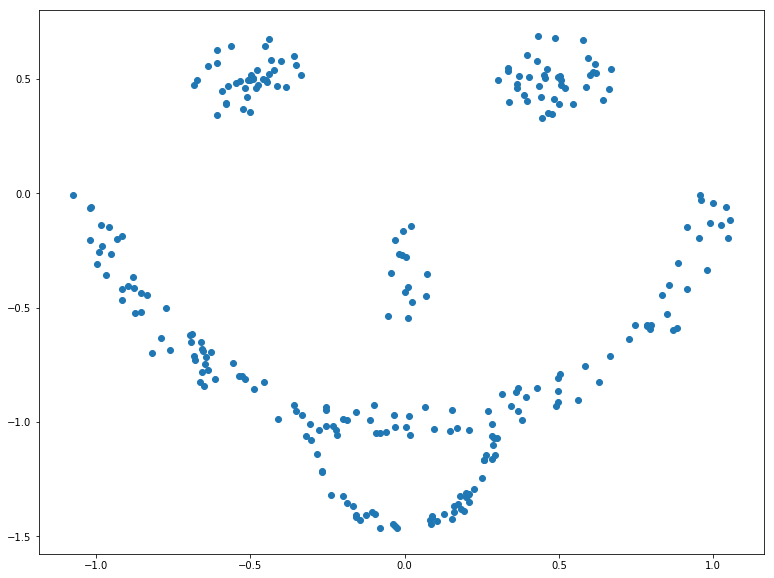

In [4]:
plt.figure(figsize=(13,10))
plt.scatter(data.values[:,0], data.values[:,1])
plt.show()


In [5]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    #some code from seminar
    for rect in rects:
        height = rect.get_height()
        y = rect.get_y()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 -0.2 if y >= 0 else 0.07,
                 '%.2f' % (height * (-1 if y < 0 else 1)),
                 ha='center', va='bottom', fontsize=16)
        
        
def draw_graphics(x1, x2):
    #some code from seminar
    r, pr = sps.pearsonr(x1, x2)
    rho, prho = sps.spearmanr(x1, x2)
    tau, ptau = sps.kendalltau(x1, x2)
    colors = [('red' if pr < 0.05 else 'blue'), 
              ('red' if prho < 0.05 else 'blue'), 
              ('red' if ptau < 0.05 else 'blue')]
    titles = ['$\\widehat{\\rho}$', '$\\rho_S$', '$\\tau$']

    plt.figure(figsize=(13, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(x1, x2, alpha=0.5, s=10)
    plt.axis('equal')
    plt.title('sample', fontsize=16)

    plt.subplot(1, 3, 2)
    rects = plt.bar([1, 2, 3], [r, rho, tau], color=colors)
    plt.hlines(0, 0.4, 3.6, color='black', alpha=0.5)
    autolabel(rects)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('correlation', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-1, 1))

    plt.subplot(1, 3, 3)
    plt.bar([1, 2, 3], [pr, prho, ptau], color=colors)
    plt.hlines(0.05, 0.4, 3.6, color='red', alpha=0.5, lw=3)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('pvalue', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-0.01, 1))

    plt.show()
    
    

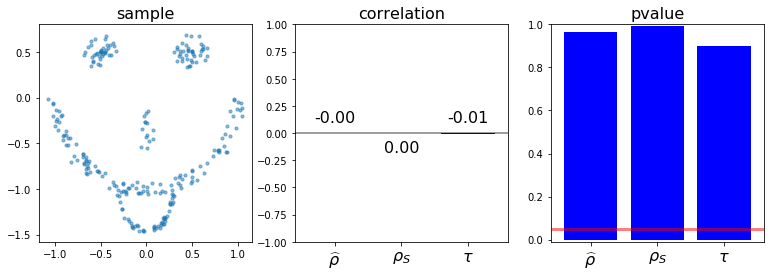

In [14]:
draw_graphics(data.values[:,0], data.values[:,1])



Коэффициенты корреляции Пирсона, Спирмена и Кенделла не отвергают гипотезу о некоррелированности не отвергается

In [38]:
data1 = np.array(data.values[:,0])
data1 = data1 - np.min(data1)
data2 = np.array(data.values[:,1])
data2 = data2 - np.min(data2)

x1 = data1 / np.max(data1)
x2 = data2 / np.max(data2)

def chi_sq(sample, sample2, K=6):
    frequance1 = np.array([np.sum([1 for x in sample if 
                  ((x > np.percentile(sample, j * 100 / K)) 
                   and (x <= np.percentile(sample, (j+1) * 100 / K))) ]) for j in range(K)])
    bounds = np.array([np.percentile(sample, q=i * 100 / K) for i in range(K + 1)])
    frequance2 = np.array([np.sum([1 for x in sample2 if 
                  ((x > np.percentile(sample, j * 100 / K)) 
                   and (x <= np.percentile(sample, (j+1) * 100 / K))) ]) for j in range(K)])
    return frequance1, frequance2
    
    
f1, f2 = chi_sq(x1,x2)
print("P-value for chi2: %f" % sps.chi2_contingency([f1,f2])[1])



P-value for chi2: 0.000000


* Хи-квадрат критерий отвергает гипотезу о независимоти